# P-value(假设验证）

相关概念
* 虚无假设（也叫零假设，Null Hypothesis），通常记作H0。
* 对立假设（Alternative Hypothesis），通常记作H1。
* chi—square （卡方）
$$x^2=\sum_{i=1}^{n}\frac{(O_i-E_i)^2}{E_i}$$

$$O_i:观察值$$
$$E_i:期望值$$
卡方表

![avatar](https://upload-images.jianshu.io/upload_images/3086153-018bccd5938c0294.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1000/format/webp)
$$
\begin{align}
&\alpha:H0成立，H1判断不成立的概率\\
& n:自由度\\
\end{align}
$$

数据分布与数据分布的相似度计算

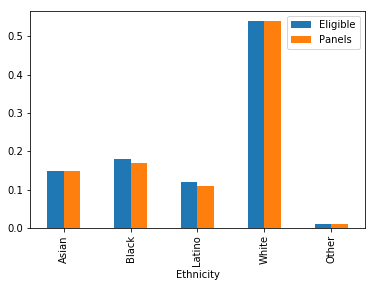

In [82]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
#所有候选合格人的比例，出现在选拔赛中的比例
jury = pd.DataFrame(
    {'Ethnicity':['Asian', 'Black', 'Latino', 'White', 'Other'],
    'Eligible':[ 0.15, 0.18, 0.12, 0.54, 0.01],
    'Panels': [0.15, .17, .11, .54, .01]}
)
jury=jury.set_index(jury['Ethnicity']).drop(labels=['Ethnicity'],axis=1)
jury.plot.bar()

两个数据分布的距离

In [26]:
jury.eval('Difference=Panels-Eligible')['Difference'].abs().sum()/2
table_tvd(jury, 'Eligible', 'Panels')
# 两个数据分布的距离

0.03999999999999999

0.011114934618031666

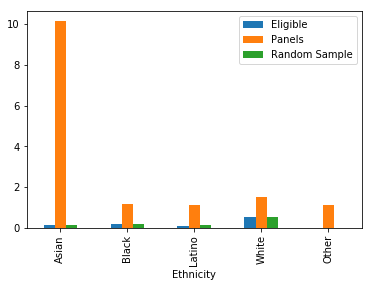

In [72]:
def total_variation_distance(distribution_1, distribution_2):
    return np.abs(distribution_1 - distribution_2).sum()/2
def table_tvd(table, label, other):
    return total_variation_distance(table[label], table[other])
def proportions_from_distribution(table, label, sample_size):
    proportions = np.random.multinomial(sample_size, table[label])/sample_size
    table['Random Sample']=proportions
    return table
panel_size = 1453
panels_and_sample=proportions_from_distribution(jury, 'Eligible', panel_size)
panels_and_sample.plot.bar()
table_tvd(panels_and_sample, 'Eligible', 'Random Sample')

随机取样500次中值0.016765与样本组0.015类似,说明取随机样本和总体数据分布较类似

TVD    0.006593
dtype: float64

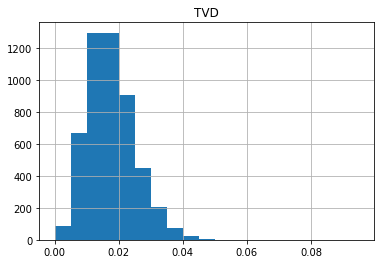

In [83]:
panel_size = 1453
repetitions = 5000

tvds = pd.DataFrame()

for i in np.arange(repetitions):

    new_sample = proportions_from_distribution(jury, 'Eligible', panel_size)
    tvds = np.append(tvds, table_tvd(new_sample, 'Eligible', 'Random Sample'))

results = pd.DataFrame({'TVD':tvds})
results.hist(bins=np.arange(0,0.1,0.005))
# results.hist(bins=np.arange(0, 0.1, 0.005))
abs(results.median()-table_tvd(jury, 'Eligible', 'Panels'))

In [84]:
print("{}个自由度".format(len(jury)))
print("p-value={}".format(abs(results.median()-table_tvd(jury, 'Eligible', 'Panels')).values))

5个自由度
p-value=[0.00659326]


In [118]:
np.percentile(results,50)


0.03318651066758429

In [117]:
results.quantile(0.5)

TVD    0.016593
Name: 0.5, dtype: float64

# 自举法

 自举法是在1个容量为n的原始样本中重复抽取一系列容量也是n的随机样本，并保证每次抽样中每一样本观察值被抽取的概率都是1/n(复置抽样)。这种方法可用来检查样本统计数θ的基本性质，估计θ的标准误和确定一定置信系数下θ的置信区间。